WHAT IS ggplot2?
----

ggplot2 is an actively maintained open-source chart-drawing package for R, written by Hadley Wickham, based upon the principles of "Grammar of Graphics". It partially replaces R's basic plot and the lattice package, while providing a clean, powerful, orthogonal and fun API.

The basic concept of a ggplot2 graphic in R is that you combine different elements into layers.

You independently specify plot building blocks and combine them to create just about any kind of graphical display you want. 

Building blocks of a graph include:

- The data that you want to plot: For ggplot(), this must be a data frame.

- A mapping from the data to your plot: This usually is as simple as telling ggplot() what goes on the x-axis and what goes on the y-axis.

- A geometric object, or geom in ggplot terminology: The geom defines the overall look of the layer (for example, whether the plot is made up of bars, points, or lines).

- A statistical summary, called a stat in ggplot: This describes how you want the data to be summarized (for example, binning for histograms, or smoothing to draw regression lines).

And also:
- scales
- coordinate system
- position adjustments
- faceting

In practice, you describe all this in a short line of code. 

For example, here is the ggplot2 code to plot some data using two layers.

ggplot(diamand, aes(x=carat, y=price)) + geom_point() + stat_smooth()

The first layer is a geom that draws the points of a scatterplot; the second layer is a stat that draws a smooth line through the points.

What is a data frame?
--

It generally refers to "tabular" data. 

A data frame is a list of variables (columns) of the same number of rows with unique row names.

There is qplot and ggplot - what are the differences?
----

- Think of qplot() as a Quick Plot.

- Think of ggplot() as a much more Complex Plot.

How to load ggplot2 and how to have a quick look at Data?
--

In [4]:
##some re-scaling of plots for my notebook - non-important for now
library(repr)
options(repr.plot.width=4, repr.plot.height=4)

##loading ggplot2 package
library(ggplot2)

In [2]:
#lets choose the dataset we are going to work on
library(MASS)

#Structure of the dataset UScereal
str(UScereal)


Attaching package: 'MASS'

The following object is masked from 'package:plotly':

    select



'data.frame':	65 obs. of  11 variables:
 $ mfr      : Factor w/ 6 levels "G","K","N","P",..: 3 2 2 1 2 1 6 4 5 1 ...
 $ calories : num  212 212 100 147 110 ...
 $ protein  : num  12.12 12.12 8 2.67 2 ...
 $ fat      : num  3.03 3.03 0 2.67 0 ...
 $ sodium   : num  394 788 280 240 125 ...
 $ fibre    : num  30.3 27.3 28 2 1 ...
 $ carbo    : num  15.2 21.2 16 14 11 ...
 $ sugars   : num  18.2 15.2 0 13.3 14 ...
 $ shelf    : int  3 3 3 1 2 3 1 3 2 1 ...
 $ potassium: num  848.5 969.7 660 93.3 30 ...
 $ vitamins : Factor w/ 3 levels "100%","enriched",..: 2 2 2 2 2 2 2 2 2 2 ...


UScereal - Nutritional and Marketing Information on US Cereals
--

Type: help(UScereal)


The UScereal data frame has 65 rows and 11 columns. 

This data frame contains the following columns:
- mfr - manufacturer, represented by its first initial.
- calories - number of calories in one portion.
- protein - grams of protein in one portion.
- fat - grams of fat in one portion.
- sodium - milligrams of sodium in one portion.
- fibre - grams of dietary fibre in one portion.
- carbo - grams of complex carbohydrates in one portion.
- sugars - grams of sugars in one portion.
- shelf - display shelf (1, 2, or 3, counting from the floor).
- potassium - grams of potassium.
- vitamins - vitamins and minerals (none, enriched, or 100%).

In [10]:
#some lines
head(UScereal)

,mfr,calories,protein,fat,sodium,fibre,carbo,sugars,shelf,potassium,vitamins
100% Bran,N,212.1212,12.121212,3.030303,393.9394,30.303030,15.15152,18.18182,3,848.48485,enriched
All-Bran,K,212.1212,12.121212,3.030303,787.8788,27.272727,21.21212,15.15151,3,969.69697,enriched
All-Bran with Extra Fiber,K,100.0000,8.000000,0.000000,280.0000,28.000000,16.00000,0.00000,3,660.00000,enriched
Apple Cinnamon Cheerios,G,146.6667,2.666667,2.666667,240.0000,2.000000,14.00000,13.33333,1,93.33333,enriched
Apple Jacks,K,110.0000,2.000000,0.000000,125.0000,1.000000,11.00000,14.00000,2,30.00000,enriched
Basic 4,G,173.3333,4.000000,2.666667,280.0000,2.666667,24.00000,10.66667,3,133.33333,enriched


USE PANDER HERE!!!!

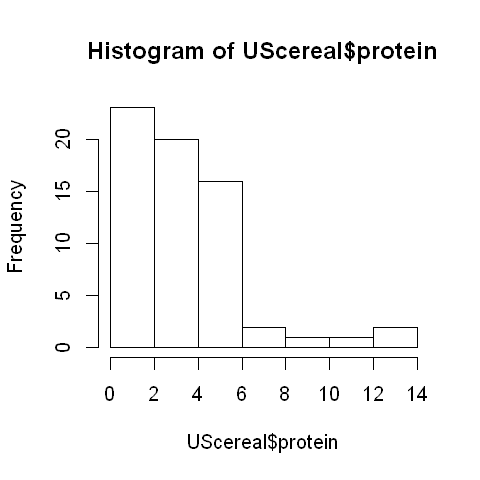

In [14]:
##Basic Histogram without ggplot2
hist(UScereal$protein)

Basic plot:
---------------------------------------

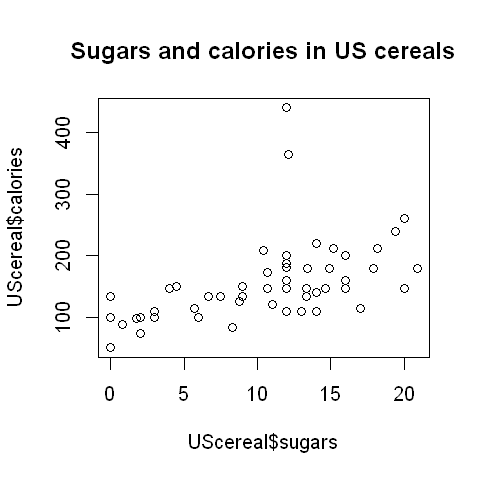

In [19]:
plot(UScereal$sugars, UScereal$calories)
title("Sugars and calories in US cereals")
points(sugars ~ calories, col="red", data=UScereal)

Lets Start With qplot()
----------------------

For start we will learn to make some simple plots with our first ggplot2 function: qplot.

qplot() has been designed to be very similar to plot(), which should make it easy if you're already familiar with plotting in R. 

During an R session you can always get a summary of all the arguments to qplot() with R help, ?qplot

SCATTER-PLOTS
--------------

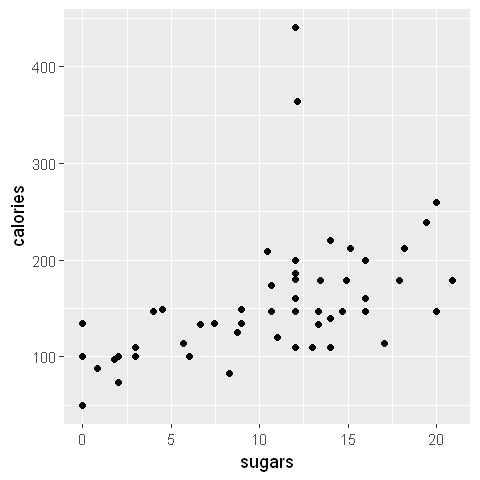

In [37]:
qplot(sugars, calories, data = UScereal)

Lets have a look:

qplot(x, y, data=, color=, shape=, size=, alpha=, geom=, method=, formula=, facets=, xlim=, ylim= xlab=, ylab=, main=, sub=)

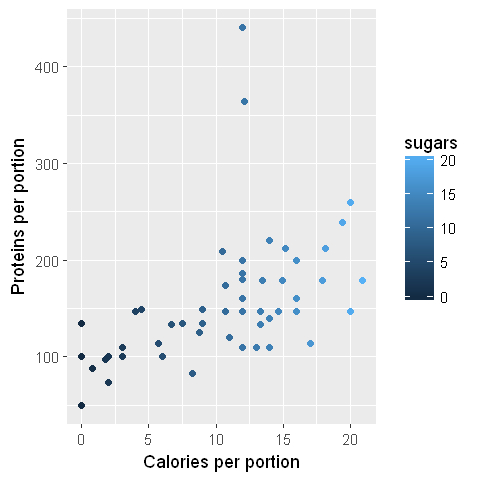

In [29]:
qplot(sugars, calories, data=UScereal, color = sugars, xlab="Calories per portion", ylab="Proteins per portion")

QUESTION:

- Look at the dataset airquality that comes with R
- Plot a scatter plot of Ozone Vs. Day
- Name the axis
- Let Wind be the color

In [8]:
head(airquality)
##There are many NA's in this dataset. Be carefull!

Ozone,Solar.R,Wind,Temp,Month,Day
41,190,7.4,67,5,1
36,118,8.0,72,5,2
12,149,12.6,74,5,3
18,313,11.5,62,5,4
NA,NA,14.3,56,5,5
28,NA,14.9,66,5,6


Warning message:
"Removed 37 rows containing missing values (geom_point)."

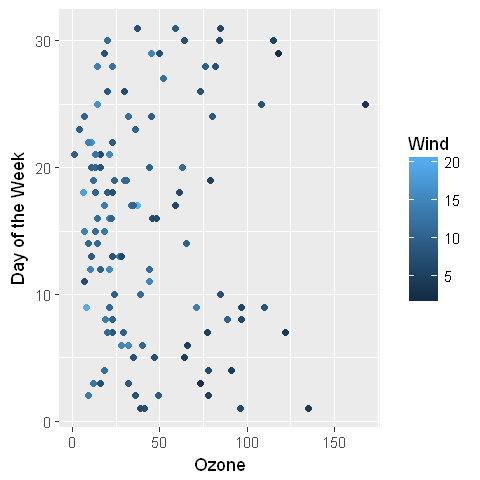

In [9]:
library(datasets)
qplot(Ozone, Day, data=airquality, color=Wind, xlab="Ozone", ylab="Day of the Week")

Colour, size and shape are all examples of aesthetic attributes, visual properties that affect the way observations are displayed. We will talk about it in a minute.

Back to UScereal:

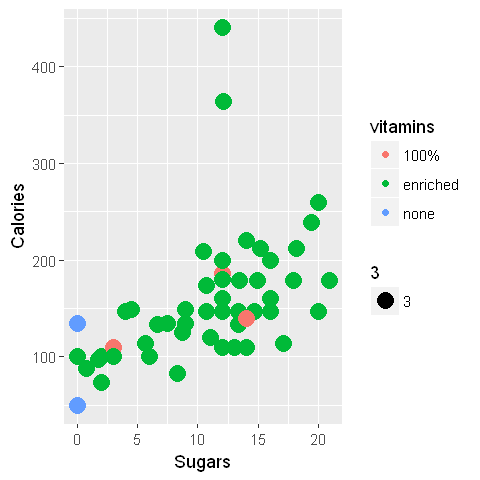

In [32]:
qplot(sugars, calories, data = UScereal, color=vitamins, size=3, xlab="Sugars", 
      ylab="Calories")

To make a semi-transparent colour you can use the alpha aesthetic, which takes a value between 0 (completely transparent) and 1 (complete opaque). 

It's often useful to specify the transparency as a fraction, e.g., 1/10 or 1/20, as the denominator specifies the number of points that must overplot to get a completely opaque colour.

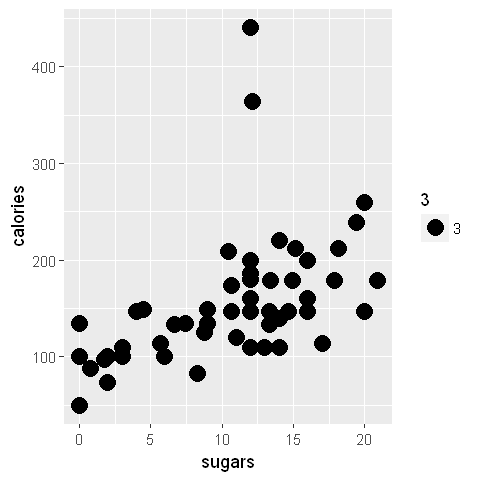

In [41]:
qplot(sugars, calories, data = UScereal, size=3) #no transparency

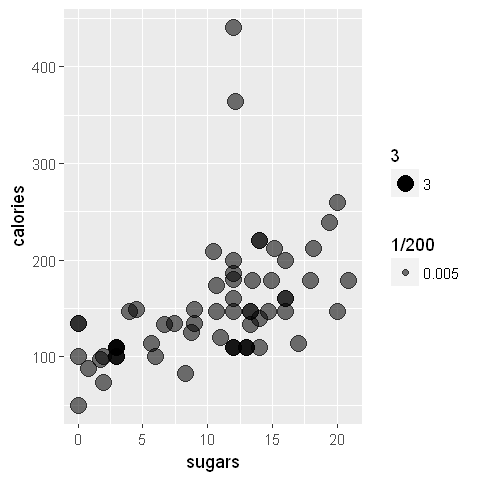

In [42]:
qplot(sugars, calories, data = UScereal, size=3, alpha = 1/200)

qplot is not limited to scatterplots, but can produce almost any kind of plot by varying the geom. 

About geoms
--

Geom, short for geometric object, describes the type of object that is used to display the data.

The following geoms enable you to investigate two-dimensional relationships:

geom = "point" draws points to produce a scatterplot. This is the default when you supply both x and y arguments.

geom = "smooth" fits a smoother to the data and displays the smooth and its standard error.

geom = "boxplot" produces a box-and-whisker plot to summarise the distribution of a set of points.

geom = "path" and geom = "line" draw lines between the data points. Traditionally these are used to explore relationships between time and another variable, but lines may be used to join observations connected in some other way. A line plot is constrained to produce lines that travel from left to right, while paths can go in any direction.

For 1d distributions, your choice of geoms is guided by the variable type:

For continuous variables, geom = "histogram" draws a histogram, geom = "freqpoly" a frequency polygon, and geom = "density" creates a density plot. The histogram geom is the default when you only supply an x value to qplot().

For discrete variables, geom = "bar" makes a bar chart.

<img src="geoms.png">

THE ggplot!!
---------------------

Quick Review:

- "gg" stand for grammar of graphics.

- This means ggplot2 contains building blocks with which you can create your own graphical objects. 

What are the basic components of ggplot2 plots?

- DATA FRAME, which contains the data we are trying to plot
- AESTHETIC MAPPINGS determine how data are mapped to color, size, shape, etc
- GEOMS (geometric objects) are what you see in the plot (points, lines, shapes)
- FACETS are the panels used in conditional plots
- STATS are statistical transformations such as binning, quantiles, and smoothing which ggplot2 applies to the data
- SCALES show what coding an aesthetic map uses (for example, male = red, female = blue)
- COORDINATE SYSTEM


Aesthetic Mapping
--

In ggplot land aesthetic means "something you can see". Examples include:

- position (i.e., on the x and y axes)
- color ("outside" color)
- fill ("inside" color)
- shape (of points)
- linetype
- size

In [44]:
g <- ggplot(UScereal, aes(sugars, calories))

This means that x is "sugars" and y is "calories".

"Sugars" and "Calories" are column names of the Data Frame UScereal.

Lets look at same examples:

In [56]:
g <- ggplot(UScereal, aes(sugars, calories, color=vitamins))

In [46]:
str(UScereal)

"vitamins" and "mft" are also columns of the Dataframe UScereal.

'data.frame':	65 obs. of  11 variables:
 $ mfr      : Factor w/ 6 levels "G","K","N","P",..: 3 2 2 1 2 1 6 4 5 1 ...
 $ calories : num  212 212 100 147 110 ...
 $ protein  : num  12.12 12.12 8 2.67 2 ...
 $ fat      : num  3.03 3.03 0 2.67 0 ...
 $ sodium   : num  394 788 280 240 125 ...
 $ fibre    : num  30.3 27.3 28 2 1 ...
 $ carbo    : num  15.2 21.2 16 14 11 ...
 $ sugars   : num  18.2 15.2 0 13.3 14 ...
 $ shelf    : int  3 3 3 1 2 3 1 3 2 1 ...
 $ potassium: num  848.5 969.7 660 93.3 30 ...
 $ vitamins : Factor w/ 3 levels "100%","enriched",..: 2 2 2 2 2 2 2 2 2 2 ...


To plot it we need to choose a geom. Perhaps a Scatter Plot is the appropriate for now.

SCATTER PLOTS - Lets talk about them!
--

Scatter plots are similar to line graphs in that they use horizontal and vertical axes to plot data points. However, they have a very specific purpose. Scatter plots show how much one variable is affected by another. The relationship between two variables is called their correlation.

The data is displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. 

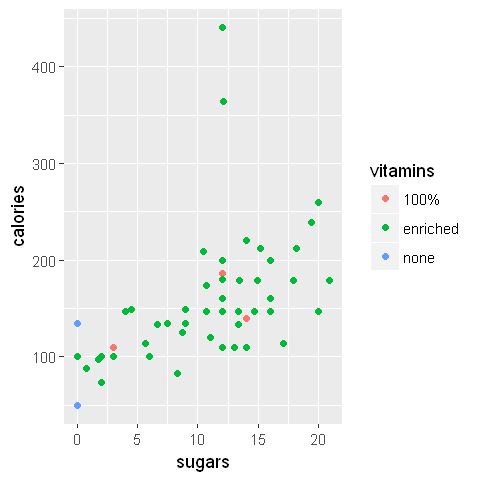

In [57]:
g + geom_point()

Let's practice modifying aesthetics now.

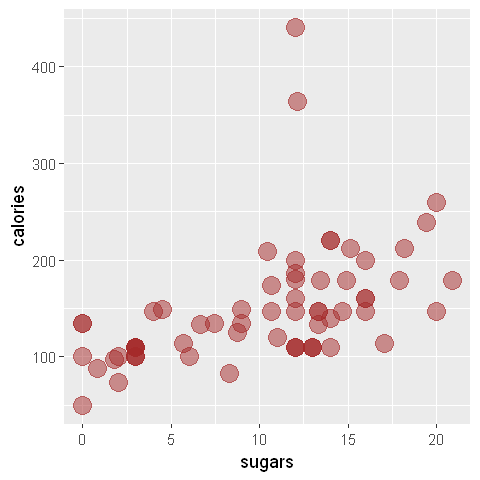

In [58]:
g + geom_point(color = "brown", size=5, alpha = 1/2)

We can see that some circles are more transparent than others, 
because they correspond to a higher frquency.

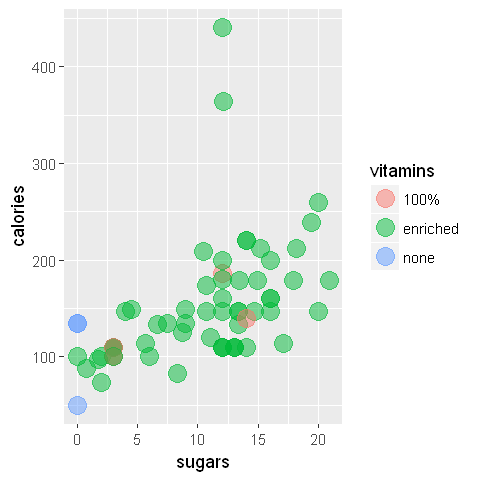

In [59]:
g + geom_point(size=5, alpha = 1/2, aes(color = vitamins))

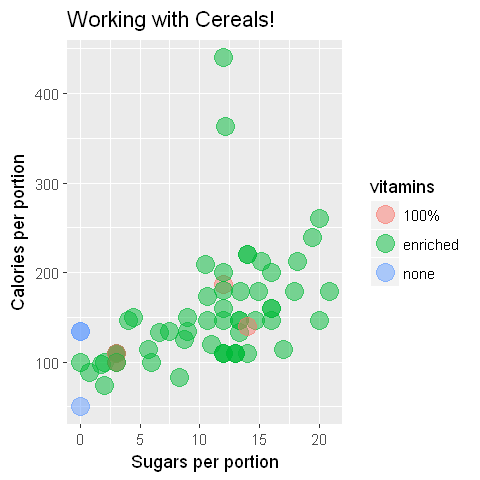

In [60]:
g + geom_point(size=5, alpha = 1/2, aes(color = vitamins)) + 
    labs(title = "Working with Cereals!") + 
    labs(x = "Sugars per portion", y= "Calories per portion")

What is the difference between a LINE GRAPH and a SCATTER PLOT?

Line graphs are like scatter plots, the difference is that a line is created connecting each data point together.

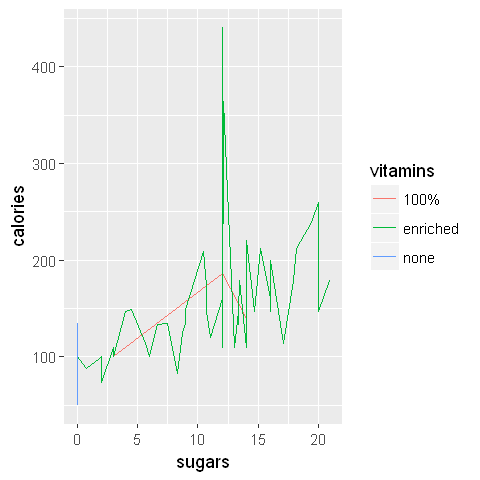

In [61]:
g + geom_line()

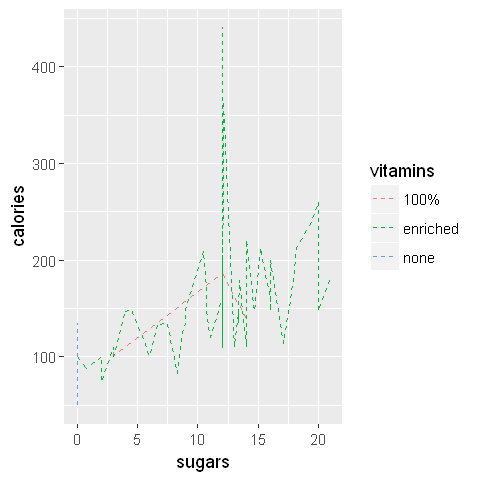

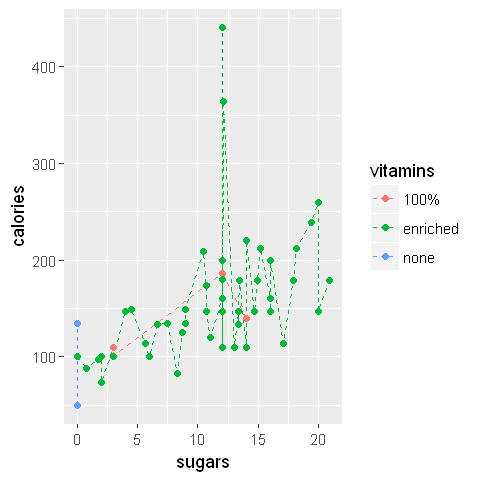

In [62]:
# Change the line type
g + geom_line(linetype = "dashed")

# I want to see the points:
g + geom_line(linetype = "dashed") + geom_point()

geom_smooth
--

The curve geom_smooth produces an estimate of the conditional mean function. In our example, it's an estimate of the mean price conditional on the number of carats (it's a particular kind of estimator called LOESS). 

`geom_smooth()` using method = 'loess'


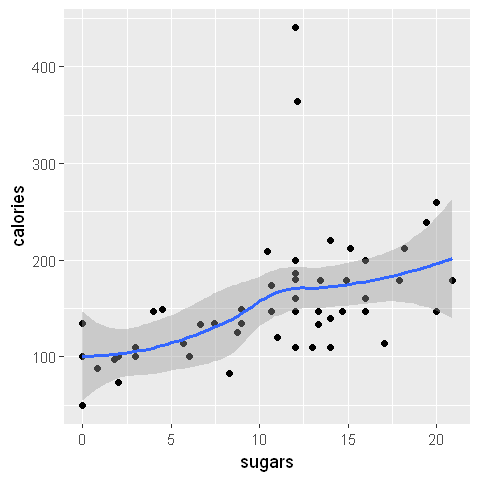

In [64]:
g <- ggplot(UScereal, aes(sugars, calories))
g + geom_point() + geom_smooth()

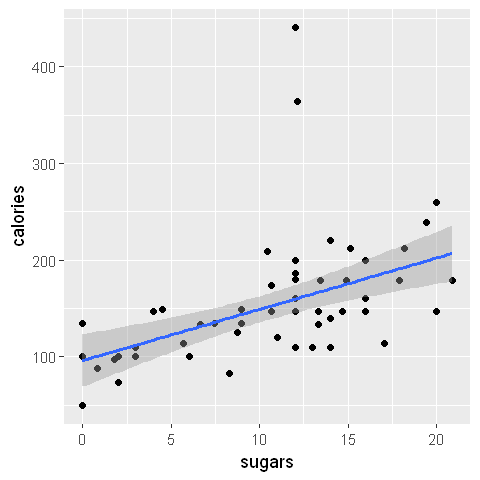

In [65]:
g + geom_point() + geom_smooth(method = "lm")

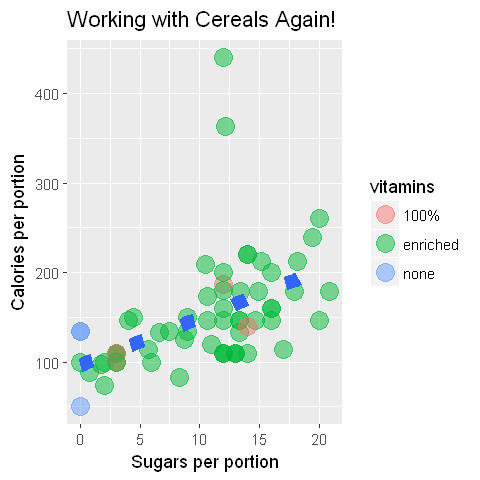

In [69]:
g + geom_point(size=5, alpha = 1/2, aes(color = vitamins)) + 
    labs(title = "Working with Cereals Again!") + 
    labs(x = "Sugars per portion", y= "Calories per portion") + 
    geom_smooth(size=4, linetype=3, method="lm", se=FALSE)

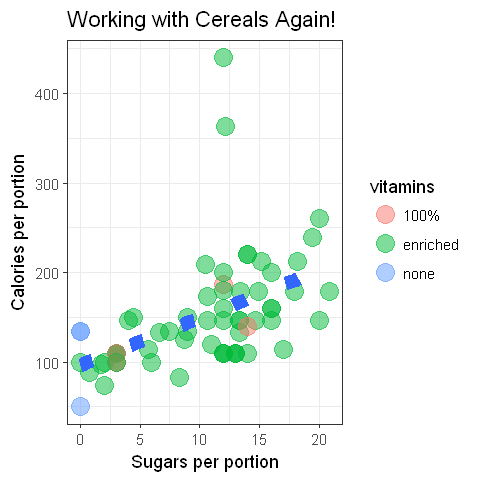

In [70]:
g + geom_point(size=5, alpha = 1/2, aes(color = vitamins)) + 
    labs(title = "Working with Cereals Again!") + 
    labs(x = "Sugars per portion", y= "Calories per portion") + 
    geom_smooth(size=4, linetype=3, method="lm", se=FALSE) + theme_bw()

Boxplots and jittered points
--

When a set of data includes a categorical variable and one or more continuous variables, you will probably be interested to know how the values of the continuous variables vary with the levels of the categorical variable. 

Box-plots and jittered points offer two ways to do this. The following example explores how the distribution of price per carat varies with the colour of the diamond using jittering (geom = "jitter") and box-and-whisker plots (geom = "boxplot").

In [77]:
g <- ggplot(UScereal, aes(vitamins, calories/protein))

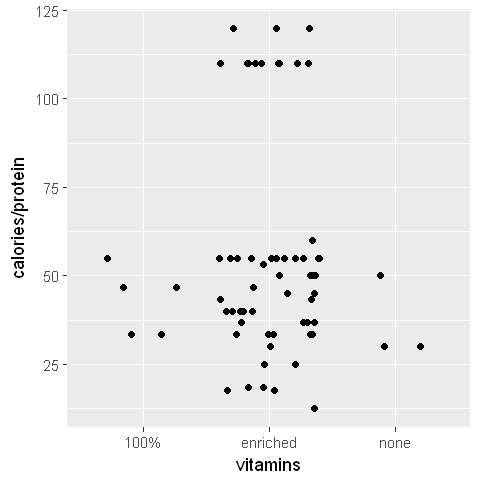

In [78]:
g + geom_jitter()

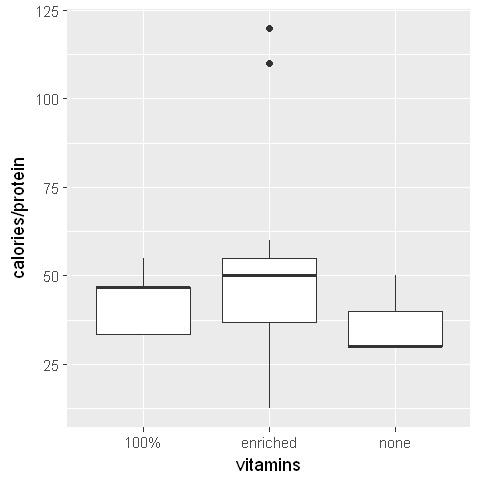

In [79]:
g + geom_boxplot()

Both plots show the dependency of the spread of calories per protein on cereal vitamins, but the boxplots are more informative, indicating the change in the median and adjacent quartiles.

Histogram and density plots
--

Histogram and density plots show the distribution of a single variable. They provide more information about the distribution of a single group than boxplots do, but it is harder to compare many groups.

The following code shows the distribution of calories with a histogram and a density plot:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


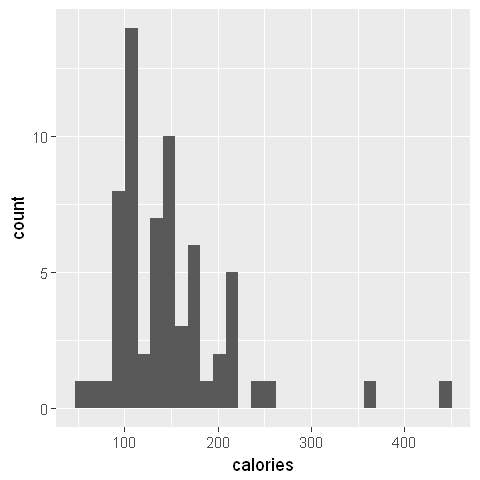

In [80]:
g <- ggplot(UScereal, aes(calories))
g + geom_histogram()

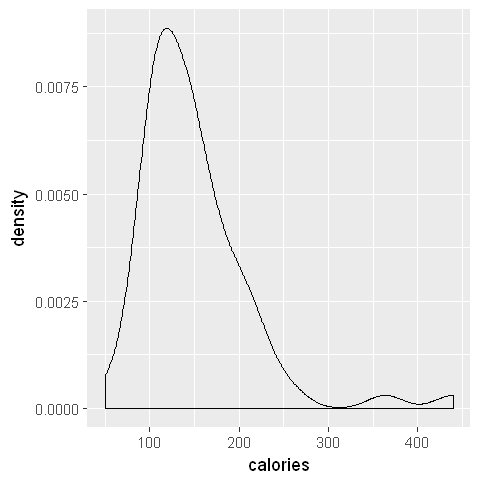

In [81]:
g + geom_density()

For the density plot, the adjust argument controls the degree of smoothness (high values of adjust produce smoother plots). For the histogram, the binwidth argument controls the amount of smoothing by setting the BIN SIZE.

WHAT IS THE BIN WIDTH?
--

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


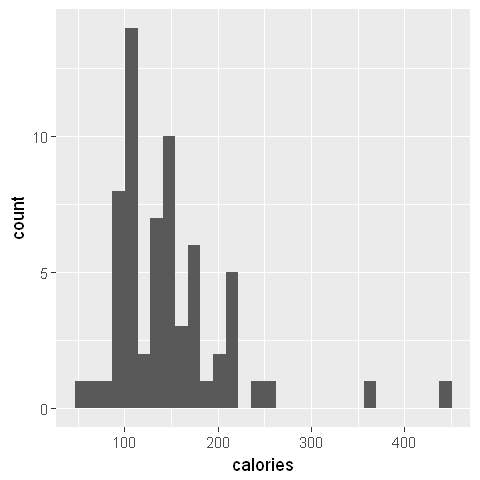

In [83]:
g <- ggplot(UScereal, aes(calories))
g + geom_histogram()

We get a message about the binwidth defaulting to 30.

When you make a histogram, you're essentially making a bar chart that shows how many data points fit within a certain range. That range is the bin width.

So in a histogram, data is grouped into "bins". 

To construct a histogram, the first step is to "bin" the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable.

Lets try to calculate the bin width. 

We simply find the range (maximum - minimum) and divide that by how many bins we'd like to have. 

A rough guideline for the number of bins is: take the square root of the number of data values you have.

In [87]:
range_calories = max(UScereal$calories) - min(UScereal$calories)
range_calories

[1] 390

In [92]:
number_bins = sqrt(nrow(UScereal))
number_bins

[1] 8.062258

In [94]:
#SO:
correct_bin_width = range_calories/number_bins
correct_bin_width

[1] 48.37355

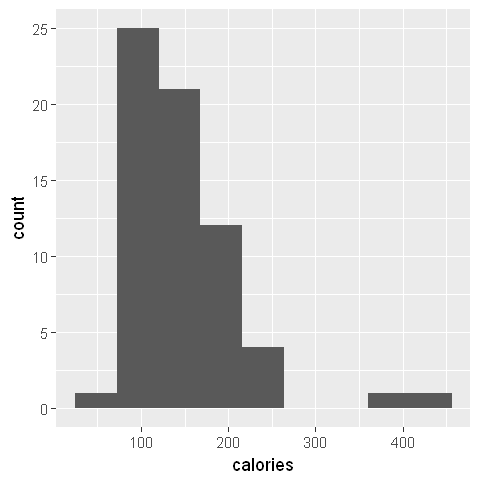

In [95]:
g + geom_histogram(binwidth = 48)

No more messages in red!!!

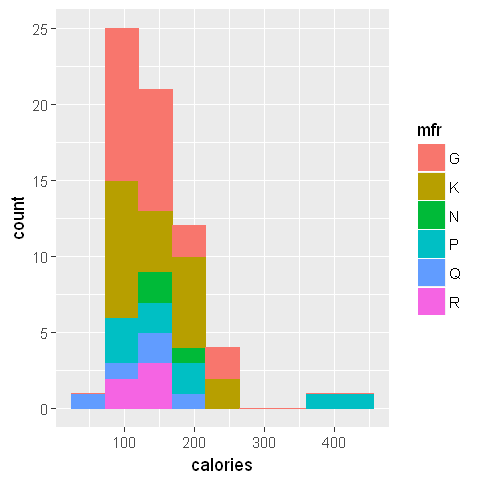

In [99]:
g + geom_histogram(binwidth = 48, aes(color=mfr, fill=mfr))

The counts within each calories grouping (bin) are distributed among the different manufacturers of cereals.

ggplot displays these distributions relative to the mfr legend on the right.

We can quickly see from this display that mainly P (Post) manufacturer of cereals have calories per portion above 300.

Time series with line and path plots
--

Line and path plots are typically used for time series data. 

Line plots join the points from left to right, while path plots join them in the order that they appear in the dataset (a line plot is just a path plot of the data sorted by x value). 

Line plots usually have time on the x-axis, showing how a single variable has changed over time. Path plots show how two variables have simultaneously changed over time, with time encoded in the way that the points are joined together.

Because there is no time variable in the UScereal data, we use the economics dataset, which contains economic data on the US measured over the last 40 years. 

The following examples shows two plots of unemployment over time, both produced using geom = "line". The first shows an unemployment rate and the second shows the median number of weeks unemployed. 

In [47]:
str(economics)

Classes 'tbl_df', 'tbl' and 'data.frame':	574 obs. of  6 variables:
 $ date    : Date, format: "1967-07-01" "1967-08-01" ...
 $ pce     : num  507 510 516 513 518 ...
 $ pop     : int  198712 198911 199113 199311 199498 199657 199808 199920 200056 200208 ...
 $ psavert : num  12.5 12.5 11.7 12.5 12.5 12.1 11.7 12.2 11.6 12.2 ...
 $ uempmed : num  4.5 4.7 4.6 4.9 4.7 4.8 5.1 4.5 4.1 4.6 ...
 $ unemploy: int  2944 2945 2958 3143 3066 3018 2878 3001 2877 2709 ...


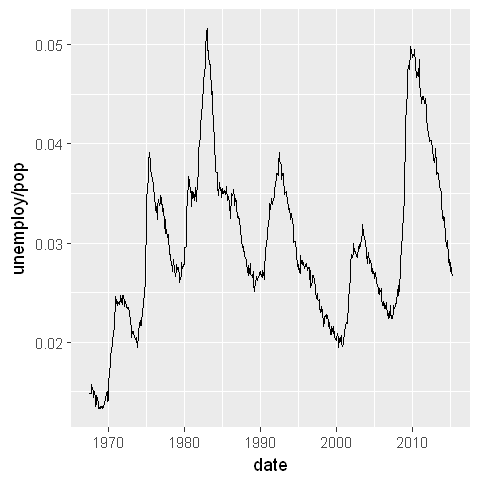

In [48]:
g <- ggplot(economics, aes(date, unemploy/pop))
g + geom_line()

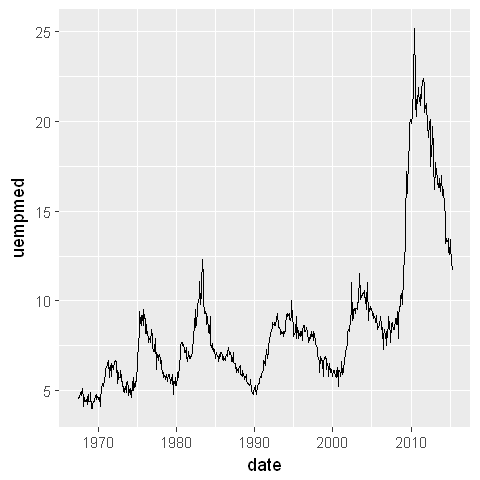

In [49]:
g <- ggplot(economics, aes(date, uempmed))
g + geom_line()

To examine this relationship in greater detail, we would like to draw both time series on the same plot. We could draw a scatterplot of unemployment rate vs. length of unemployment, but then we could no longer see the evolution over time. The solution is to join points adjacent in time with line segments, forming a path plot.

Below we plot unemployment rate vs. length of unemployment and join the individual observations with a path. Because of the many line crossings, the direction in which time flows isn't easy to see in the first plot. In the second plot, we apply the colour aesthetic to the line to make it easier to see the direction of time.

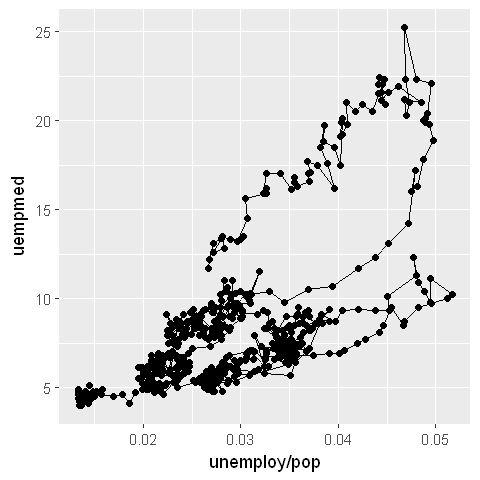

In [55]:
year <- function(x) as.POSIXlt(x)$year + 1900
g <- ggplot(economics, aes(unemploy/pop, uempmed))
g + geom_path() + geom_point()

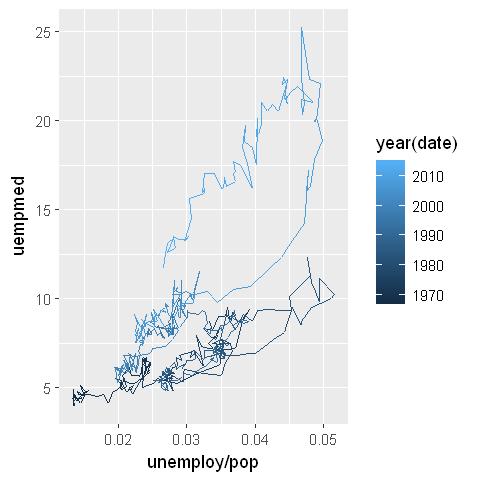

In [61]:
g <- ggplot(economics, aes(unemploy/pop, uempmed, color = year(date)))
g + geom_path()

We can see that percent unemployed and length of unemployment are highly correlated, although in recent years the length of unemployment has been increasing relative to the unemployment rate.

FACETING
--

We have already discussed using aesthetics (colour and shape) to compare subgroups, drawing all groups on the same plot.

Faceting takes an alternative approach: It creates tables of graphics by splitting the data into subsets and displaying the same graph for each subset in an arrangement that facilitates comparison.

The default faceting method in GGplot() creates plots arranged on a grid specified by a faceting formula which looks like row_var ~ col_var. 

You can specify as many row and column variables as you like, keeping in mind that using more than two variables will often produce a plot so large that it is difficult to see on screen. To facet on only one of columns or rows, use . as a place holder. 

For example, row_var ~ . will create a single column with multiple rows.


For faceting we will use a different dataset called Diamonds.

In [102]:
str(diamonds)

Classes 'tbl_df', 'tbl' and 'data.frame':	53940 obs. of  10 variables:
 $ carat  : num  0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num  61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num  55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int  326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num  3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num  3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num  2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


In [103]:
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


The following code illustrates this technique with a histogram showing the distribution of carats conditional on color. 

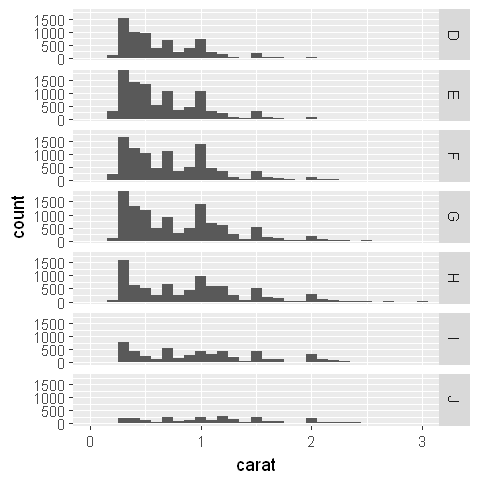

In [104]:
ggplot(diamonds, aes(carat)) + 
    geom_histogram(binwidth = 0.1) + 
    facet_grid(color ~.) + 
    coord_cartesian(xlim = c(0, 3), ylim = c(0, 1800)) 

Now lets try it with some scatter plots:

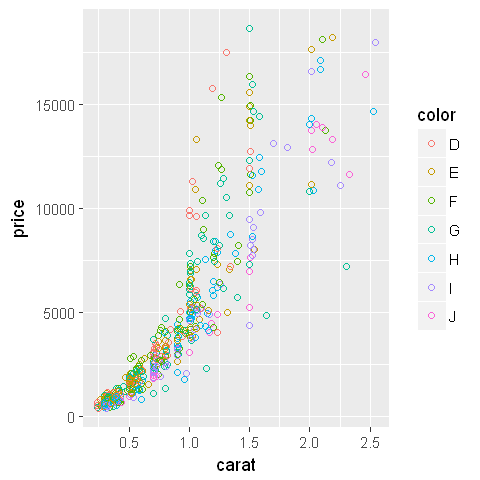

In [90]:
g <- ggplot(diamonds_small, aes(x=carat, y=price, color=color)) + geom_point(shape=1)
g

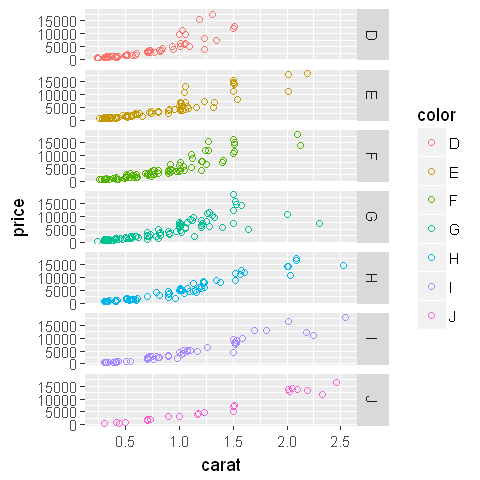

In [91]:
# Divide by levels of "color", in the vertical direction
g + facet_grid(color ~ .)

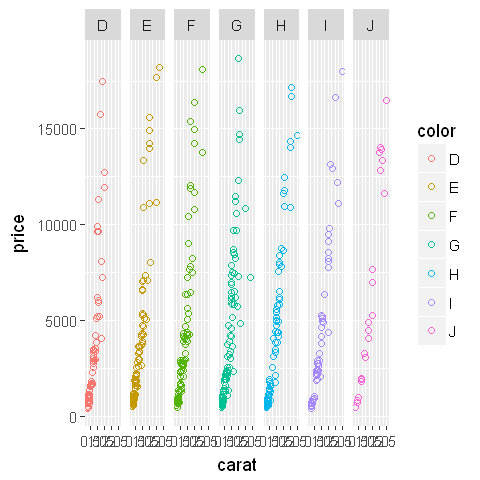

In [92]:
# Divide by levels of "color", in the horizontal direction
g + facet_grid(. ~ color)

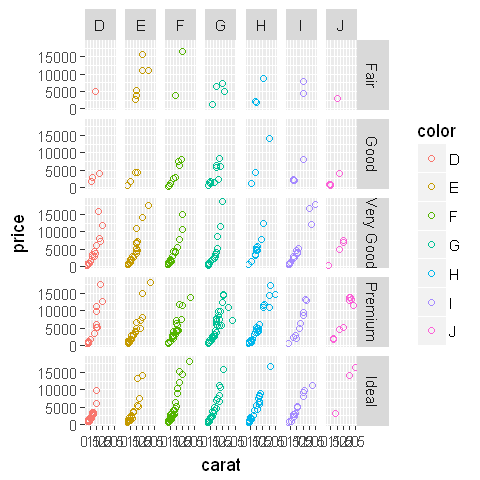

In [93]:
# Divide with "cut" vertical, "shape" horizontal
g + facet_grid(cut ~ color)

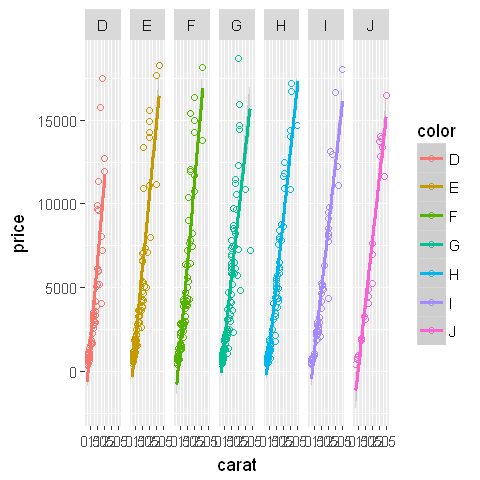

In [94]:
# Add whatever you want
g + facet_grid(. ~ color) + geom_smooth(method = "lm")

Warning message:
"Removed 166 rows containing missing values (geom_point)."

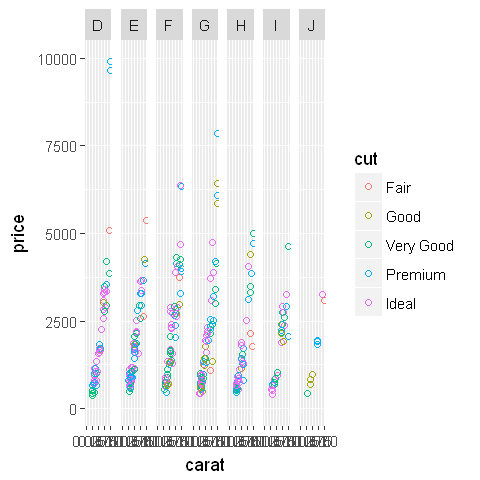

In [96]:
g <- ggplot(diamonds_small, aes(x=carat, y=price, color=cut)) + geom_point(shape=1)
g + facet_grid(. ~ color) + xlim(0,1) + ylim(0,10000)

Resolver problema dos valores no eixo dos x

plotly - Interactive ggplot
--

In [ ]:
library(plotly)

ggplot(UScereal, aes(sugars, calories, color=mfr))

ggplotly()

In [ ]:
ggplotly(ggplot()+geom_bar(data=UScereal,aes(x = sugars, colour = mfr)))
ggplotly(ggplot()+geom_bar(data=UScereal,aes(x = sugars, fill = mfr)))
ggplotly(ggplot(UScereal, aes(x= sugars, fill = mfr)) + geom_bar() + facet_grid(~mfr))
ggplotly(ggplot(UScereal, aes(x= mfr, y = sugars, fill = mfr)) + geom_boxplot()) 

In [ ]:
### IREI USAR ESTE CÓDIGo MAS NO R STUDIO PQ PARECE Q O JUPYTER NOTEBOOK NÃO CORRE O PLOTLY CORRETAMENTE

HEAT MAP!
---------------------

HEAT MAP - uses intensity (density) of colors to display relationship between two or three or many variables in a two dimensional image.


In [66]:
##some scaling again
options(repr.plot.width=4, repr.plot.height=3)

##simples data frame
a = c(1 ,2, 3, 1, 2, 3, 1, 2, 3)
b = c(2 ,3, 1, 3, 1, 2, 1, 2, 3)
c = seq(1,9, by=1)

our_data = data.frame(a, b, c, StringAsFactor = FALSE)

head(our_data)

a,b,c,StringAsFactor
1,2,1,FALSE
2,3,2,FALSE
3,1,3,FALSE
1,3,4,FALSE
2,1,5,FALSE
3,2,6,FALSE


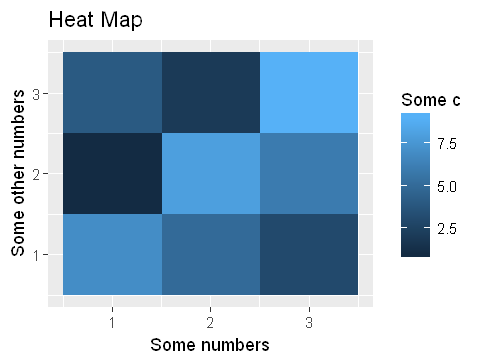

In [67]:
ggplot(our_data, aes(a, b)) + geom_raster(aes(fill = c)) +
    labs(title ="Heat Map", x = "Some numbers", y = "Some other numbers") +
    scale_fill_continuous(name = "Some c")


EXPERIMENTAR COM O DATASET PARTOS E CESARIANAS
--

In [2]:
partos <- read.csv2("partos-e-cesarianas.csv", header = TRUE, stringsAsFactors= TRUE)

In [3]:
head(partos)

PerÃ.odo,RegiÃ.o,InstituiÃ.Ã.o,LocalizaÃ.Ã.o.GeogrÃ.fica,NÂº.Total.de.Partos,NÂº.Cesarianas
2015-07,RegiÃ£o de SaÃºde Norte,"Centro Hospitalar PÃ³voa de Varzim/Vila do Conde, EPE","41.3828711, -8.7589945",432,158
2015-08,RegiÃ£o de SaÃºde Norte,"Hospital da Senhora da Oliveira, GuimarÃ£es, EPE","41.4387173, -8.3086907",1255,363
2015-07,RegiÃ£o de SaÃºde Norte,"Centro Hospitalar Entre Douro e Vouga, EPE","40.9293884, -8.5458794",828,232
2015-07,RegiÃ£o de SaÃºde do Centro,"Unidade Local de SaÃºde da Guarda, EPE","40.5309916, -7.2734793",325,106
2015-07,RegiÃ£o de SaÃºde do Centro,"Centro Hospitalar Tondela-Viseu, EPE","40.516364, -8.0827433",1047,230
2015-07,RegiÃ£o de SaÃºde LVT,"Centro Hospitalar Barreiro/Montijo, EPE","38.6554005, -9.0592392",805,235


In [5]:
indx <- apply(partos, 2, function(x) any(is.na(x) | is.infinite(x)))
indx

PerÃ.odo                   RegiÃ.o             InstituiÃ.Ã.o 
                    FALSE                     FALSE                     FALSE 
LocalizaÃ.Ã.o.GeogrÃ.fica       NÂº.Total.de.Partos            NÂº.Cesarianas 
                    FALSE                      TRUE                      TRUE

In [6]:
partos <- partos[complete.cases(partos),]

In [7]:
indx <- apply(partos, 2, function(x) any(is.na(x) | is.infinite(x)))
indx

PerÃ.odo                   RegiÃ.o             InstituiÃ.Ã.o 
                    FALSE                     FALSE                     FALSE 
LocalizaÃ.Ã.o.GeogrÃ.fica       NÂº.Total.de.Partos            NÂº.Cesarianas 
                    FALSE                     FALSE                     FALSE

In [9]:
partos$Year <- substr(partos$PerÃ.odo, 1,4)
partos$Month <- substr(partos$PerÃ.odo, 6,7)
head(partos)

PerÃ.odo,RegiÃ.o,InstituiÃ.Ã.o,LocalizaÃ.Ã.o.GeogrÃ.fica,NÂº.Total.de.Partos,NÂº.Cesarianas,Year,Month
2015-07,RegiÃ£o de SaÃºde Norte,"Centro Hospitalar PÃ³voa de Varzim/Vila do Conde, EPE","41.3828711, -8.7589945",432,158,2015,07
2015-08,RegiÃ£o de SaÃºde Norte,"Hospital da Senhora da Oliveira, GuimarÃ£es, EPE","41.4387173, -8.3086907",1255,363,2015,08
2015-07,RegiÃ£o de SaÃºde Norte,"Centro Hospitalar Entre Douro e Vouga, EPE","40.9293884, -8.5458794",828,232,2015,07
2015-07,RegiÃ£o de SaÃºde do Centro,"Unidade Local de SaÃºde da Guarda, EPE","40.5309916, -7.2734793",325,106,2015,07
2015-07,RegiÃ£o de SaÃºde do Centro,"Centro Hospitalar Tondela-Viseu, EPE","40.516364, -8.0827433",1047,230,2015,07
2015-07,RegiÃ£o de SaÃºde LVT,"Centro Hospitalar Barreiro/Montijo, EPE","38.6554005, -9.0592392",805,235,2015,07


In [10]:
library(ggplot2)

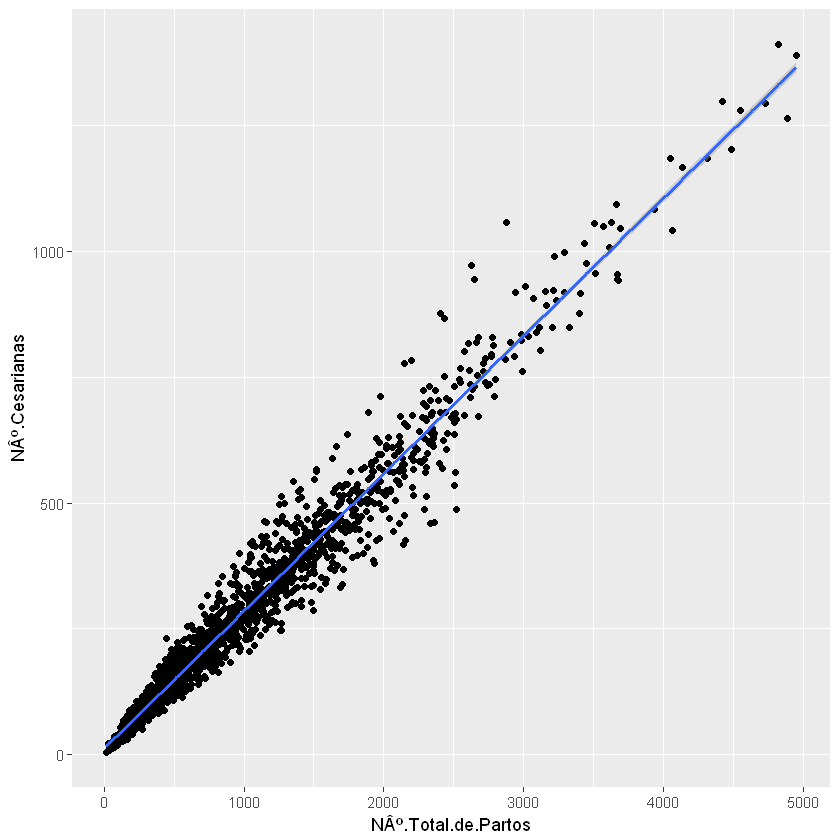

In [14]:
g <- ggplot(partos, aes(x=NÂº.Total.de.Partos, y=NÂº.Cesarianas))
g + geom_point() + geom_smooth(method="lm")

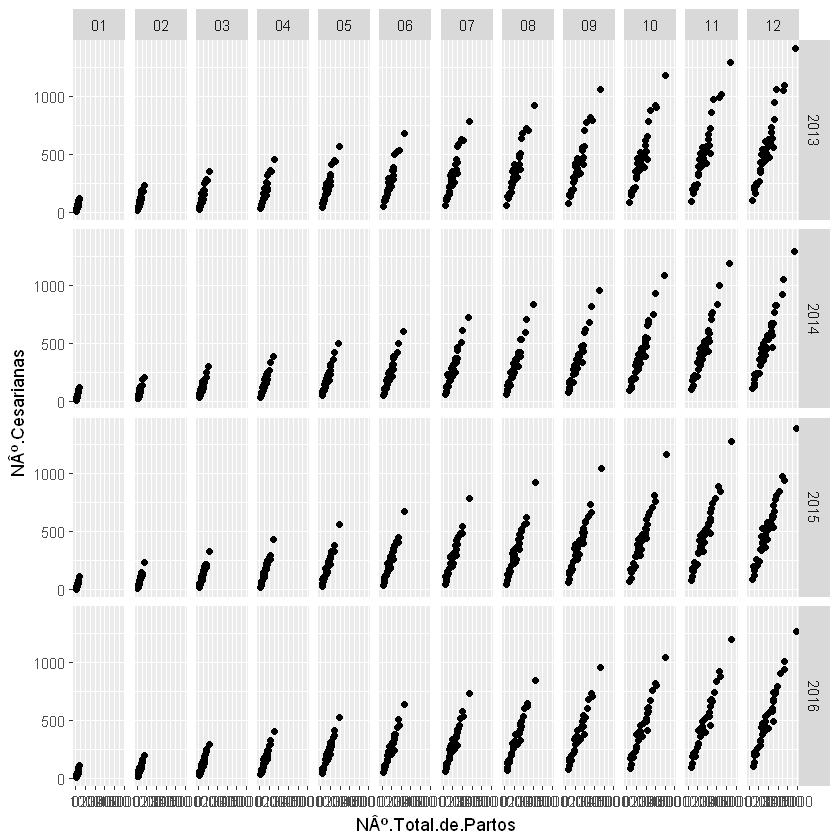

In [22]:
g + geom_point() + facet_grid(Year ~ Month)

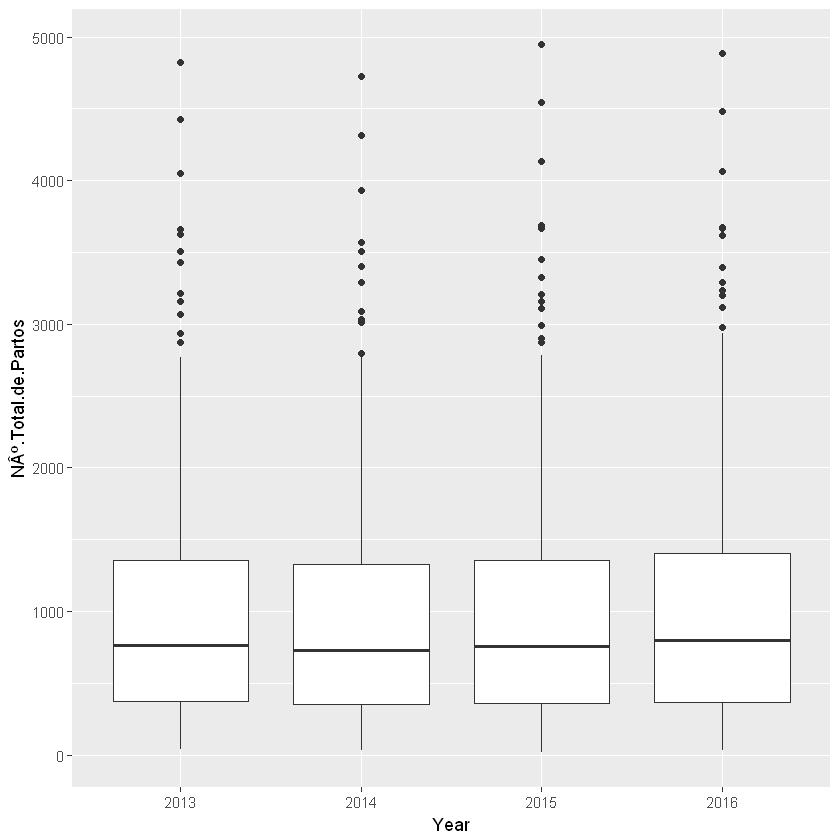

In [26]:
g <- ggplot(partos, aes(Year, NÂº.Total.de.Partos))
g + geom_boxplot()

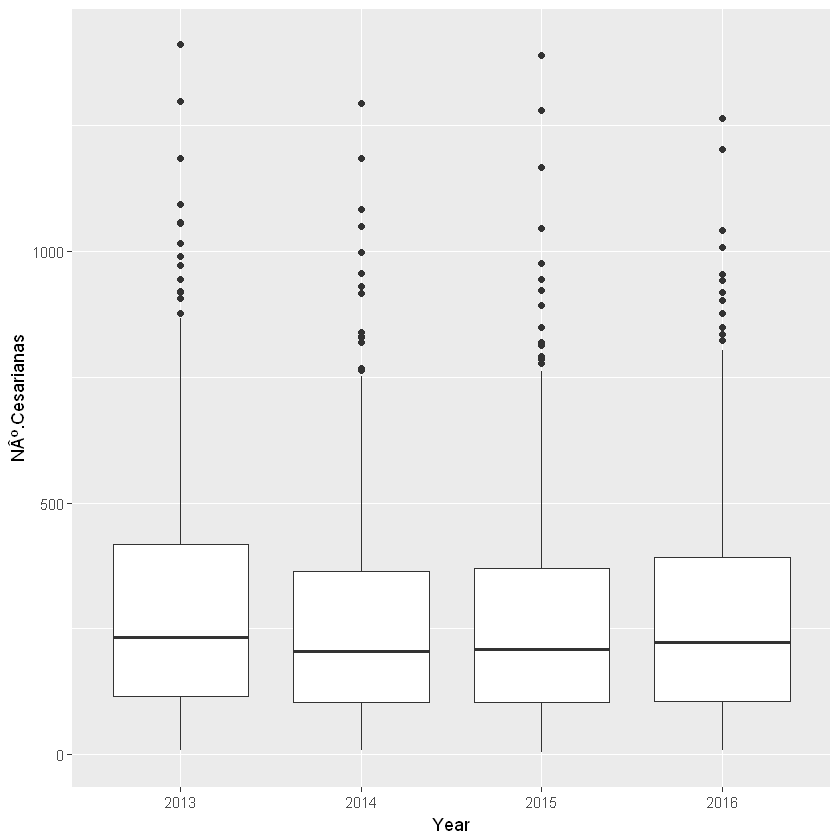

In [28]:
g <- ggplot(partos, aes(Year, NÂº.Cesarianas))
g + geom_boxplot()